Using Bayesian network, implement a Python program to calculate probability in disease diagnosis.

A medical clinic is trying to determine the probability that a patient has a certain disease. The test which is used to diagnose the disease is not always accurate. The clinic knows that the probability of a false positive is 1%, and the probability of a false negative is 5%. The clinic has a patient who has tested positive for the disease.

Knowing that disease occurs in a patient 25% times. They want to use Bayesian Theorem to calculate the probability that the patient actually has the disease. The Bayesian network will consist of two nodes: 'D' (for disease) and 'T' (for test result). conditional probability distributions (CPDs) for the nodes will be based on the provided information


## The Code

### Imports

In [5]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
import warnings
warnings.filterwarnings("ignore")

### Bayesian Network Creation using BayesianNetwork from pgmpy AND Defining CPDs using Tabular CPDS

In [6]:
def create_bayesian_network():
    '''
    Create a Bayesian Network and return the model.
    Model structure:
    D -> T

    D: Disease
    T: Test

    Values:
    D: 0 - No, 1 - Yes
    T: 0 - Negative, 1 - Positive

    CPDs:
    D: [0.75, 0.25]
    T: [[0.999, 0.01], [0.001, 0.99]]

    return: Bayesian Network model
    '''
    model = BayesianNetwork([('D', 'T')]) # D -> T
    cpd_disease = TabularCPD(variable='D', variable_card=2, values=[[0.75], [0.25]]) # CPDs are defined in the order of variable names in the model. CPDs are the conditional probability distributions.
    cpd_test = TabularCPD(variable='T', variable_card=2, values=[[0.99, 0.05], [0.01, 0.95]], evidence=['D'], evidence_card=[2])
    model.add_cpds(cpd_disease, cpd_test)
    assert model.check_model()
    return model

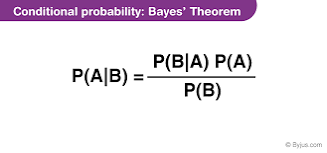

### Calculating Disease Bayesian Probablity

In [7]:
def calculate_probability_of_disease(model, test_result):
    '''
    Calculate the probability of disease given the test result using the created Bayesian Network.
    model: Bayesian Network model
    test_result: Test result
    return: Probability of disease given the test result
    '''
    inference = VariableElimination(model)
    query = inference.query(variables=['D'], evidence={'T': test_result}, show_progress=True) # query is a DiscreteFactor object which contains the marginal probability distribution of the query variables.
    return query.values[1]

### Main function to solve the problem

In [8]:
if __name__ == "__main__":
    bayesian_network = create_bayesian_network()
    test_result = 1  # 1 for positive test result, 0 for negative
    probability = calculate_probability_of_disease(bayesian_network, test_result)
    print(f"Probability of having the disease given a positive test result: {probability:.4f}")

Probability of having the disease given a positive test result: 0.9694
